### Earthquake intensity zone statistics


In [1]:
import os
import json
import geopandas as gpd
import pandas as pd
from sqlalchemy import create_engine
import psycopg2 # required for exporting to postgis
import rioxarray as rxr
from rasterio.crs import CRS
import rasterstats
from shapely.ops import transform
from datetime import datetime

import matplotlib.pyplot as plt


### Setting connection and parameters

In [2]:
# Load database configuration from file
with open(r'D:\iMMAP\code\db_config\hsdc_local_db_config.json', 'r') as f:
    config = json.load(f)

# Create database URL with credentials
db_url = f"postgresql://{config['username']}:{config['password']}@{config['host']}:{config['port']}/{config['database']}"

# Connect to the database
con = create_engine(db_url)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
reg = gpd.GeoDataFrame.from_postgis('SELECT * from afg_admbnda_region_eq_stats_v02', con)
adm1 = gpd.GeoDataFrame.from_postgis('SELECT * from afg_admbnda_adm1_eq_stats_v02', con)
adm2 = gpd.GeoDataFrame.from_postgis('SELECT * from afg_admbnda_adm2_eq_stats_v02', con)

In [5]:
#reg['pop_eq_hi'] = reg['pop_eq_8':'pop_eq_10'].sum() 
reg['pop_eq_hi'] = reg.loc[:, 'pop_eq_8':'pop_eq_10'].sum(axis=1)
adm1['pop_eq_hi'] = adm1.loc[:, 'pop_eq_8':'pop_eq_10'].sum(axis=1)
adm2['pop_eq_hi'] = adm2.loc[:, 'pop_eq_8':'pop_eq_10'].sum(axis=1)

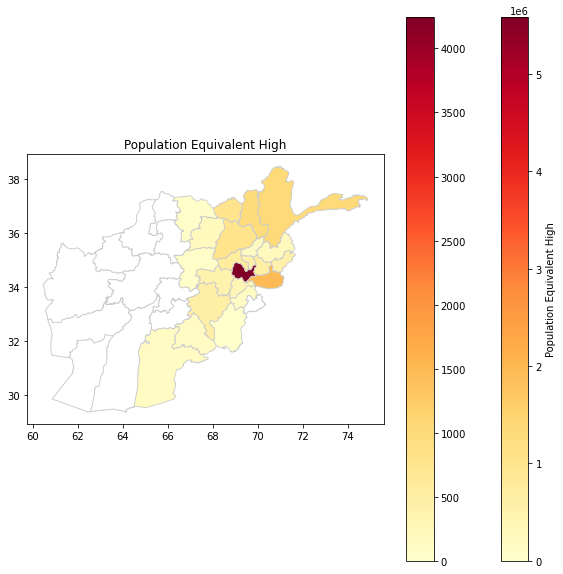

In [6]:
gdf = adm1

# Assuming your GeoPandas DataFrame is called 'gdf'
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoPandas DataFrame
gdf.plot(column='pop_eq_hi', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Population Equivalent High"})

# Set color for 0 values
gdf[gdf['pop_eq_hi'] == 0].plot(color='white', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=gdf['pop_eq_10'].min(), vmax=gdf['pop_eq_10'].max()))
cbar = fig.colorbar(sm)

# Set the title for the map
ax.set_title('Population Equivalent High')

# Display the map
plt.show()

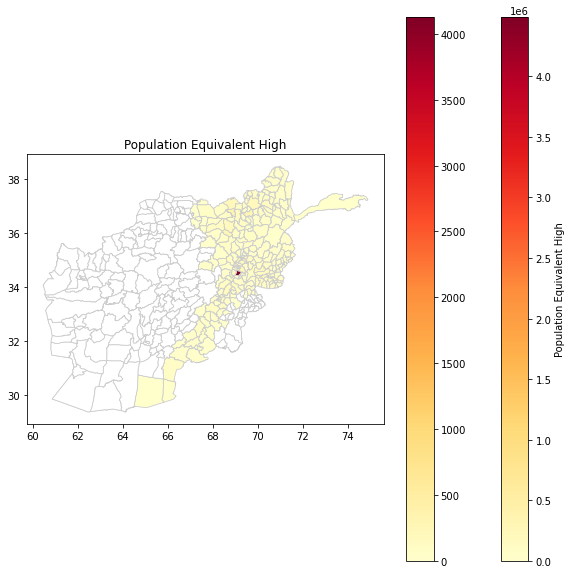

In [7]:
gdf = adm2

# Assuming your GeoPandas DataFrame is called 'gdf'
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoPandas DataFrame
gdf.plot(column='pop_eq_hi', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Population Equivalent High"})

# Set color for 0 values
gdf[gdf['pop_eq_hi'] == 0].plot(color='white', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=gdf['pop_eq_10'].min(), vmax=gdf['pop_eq_10'].max()))
cbar = fig.colorbar(sm)

# Set the title for the map
ax.set_title('Population Equivalent High')

# Display the map
plt.show()

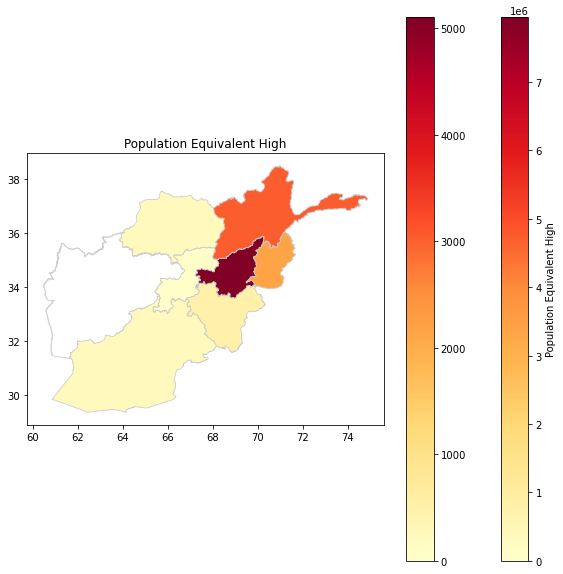

In [8]:
gdf = reg

# Assuming your GeoPandas DataFrame is called 'gdf'
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoPandas DataFrame
gdf.plot(column='pop_eq_hi', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Population Equivalent High"})

# Set color for 0 values
gdf[gdf['pop_eq_hi'] == 0].plot(color='white', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=gdf['pop_eq_10'].min(), vmax=gdf['pop_eq_10'].max()))
cbar = fig.colorbar(sm)

# Set the title for the map
ax.set_title('Population Equivalent High')

# Display the map
plt.show()

In [9]:
reg.to_postgis('afg_admbnda_region_eq_stats_v03', con)
adm1.to_postgis('afg_admbnda_adm1_eq_stats_v03', con)
adm2.to_postgis('afg_admbnda_adm2_eq_stats_v03', con)